In [1]:
pip install yfinance==0.1.70

  Using cached https://files.pythonhosted.org/packages/a1/b5/bf3bf6adf9acdd18ac15f93e2d42b7a9a468f8cb70144e316980d9d9dd61/yfinance-0.1.70-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2d/61/08076519c80041bc0ffa1a8af0cbd3bf3e2b62af10435d269a9d0f40564d/requests-2.27.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/cf/1d/163933bd0addc7a8cd46850fb7857efd5e617047ebe726972763d7ca7d60/lxml-4.8.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/06/b3/24afc8868eba069a7f03650ac750a778862dc34941a4bebeb58706715726/charset_normalizer-2.0.12-py3-none-any.whl
  Found existing installation: requests 2.21.0
    Uninstalling requests-2.21.0:
      Successfully uninstalled requests-2.21.0
  Found existing installation: lxml 4.3.2
    Uninstalling lxml-4.3.2:
      Successfully uninstalled lxml-4.3.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
initial_data = yf.download("SOL-GBP", start="2021-03-01", end="2022-03-01") #downloading data from yahoo finance

[*********************100%***********************]  1 of 1 completed


In [4]:
initial_data.head()#showing the first 5 data information

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,9.380488,11.135393,9.342703,10.737050,10.737050,220010558
2021-03-02,10.745132,10.929354,9.638920,10.003242,10.003242,127952395
2021-03-03,10.006552,10.546589,9.864049,10.139596,10.139596,110500622
2021-03-04,10.124709,10.229670,9.189222,9.427313,9.427313,83753673
2021-03-05,9.404513,9.414270,8.796410,9.114677,9.114677,65758102


In [5]:
initial_data[['Adj Close']].head()

,Adj Close
Date,
2021-03-01,10.737050
2021-03-02,10.003242
2021-03-03,10.139596
2021-03-04,9.427313
2021-03-05,9.114677


In [6]:
data =  initial_data[['Adj Close']]
data.head()

,Adj Close
Date,
2021-03-01,10.737050
2021-03-02,10.003242
2021-03-03,10.139596
2021-03-04,9.427313
2021-03-05,9.114677


In [7]:
data.describe().round(2)   #showig data description

,Adj Close
count,366.00
mean,71.89
std,52.92
min,9.11
25%,23.83
50%,63.97
75%,116.59
max,191.83


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C49CACE9B0>],
      dtype=object)

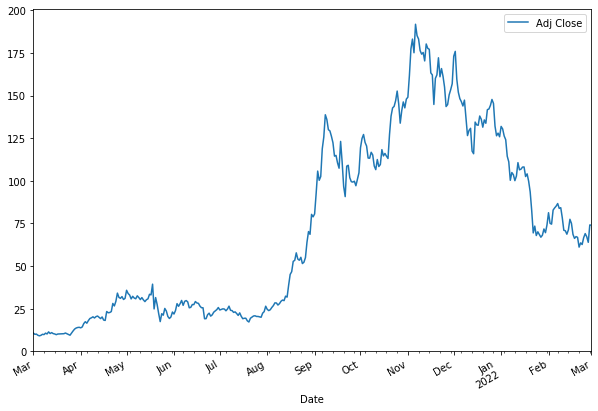

In [8]:
data.plot(figsize=(10, 7), subplots=True) #plotting the movement of the stock

In [9]:
log_return = np.log(initial_data['Adj Close'] / initial_data['Adj Close'].shift(1)) #calculating the volaltilty of the stock

In [10]:
vol = log_return.std()    #daily volatility
print('The daily volatility is', round(vol*100,2), '%')

The daily volatility is 7.47 %


In [11]:
vol = np.sqrt(252) * log_return.std()  #annualised volatility
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 118.64 %


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4A1549240>],
      dtype=object)

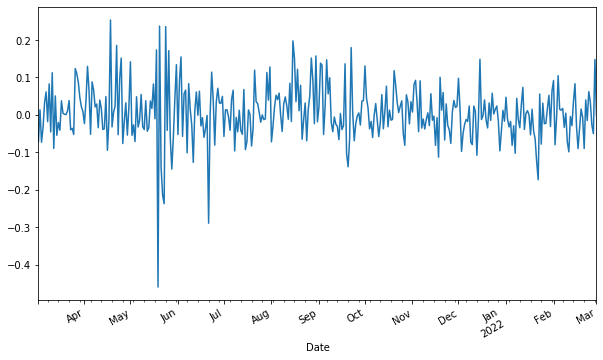

In [12]:
log_return.dropna(inplace=True) #volatility graph
log_return.plot(subplots=True, figsize=(10, 6))

In [13]:
last_six_vol = round(data['Adj Close'][125:].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The last six months volatility is', last_six_vol, '%')   # last six months volatility

The last six months volatility is 98.34 %


In [14]:
first_six_vol = round(data['Adj Close'][:125].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The first six months volatility is', first_six_vol, '%') # first six months volatility   

The first six months volatility is 151.17 %


# QUESTION 2:-

Methodology

# BINOMIAL TREE

This involves using an iterative apporaoch utilizing multiple steps to value option prices. The model is based on the assumption that there is a risk neutral enivronment, the interest rates are constant and the price of underlying asset takes two values; goes up or goes down

In [15]:
S = initial_data['Adj Close'][-1]
print('The spot price is', round(S,2))  # getting the spot price

The spot price is 73.98


In [114]:
S0 = 73.98          # spot stock price
K = 85              # strike price
T = 1/12             # time to maturity 
r =  0.0169            # risk free rate 
sig = 1.1864         # annaulised volatility
N =  5               # number of time steps of the tree
payoff =  "call"     # payoff

In [115]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up probability factor
d = 1.0 / u   

In [116]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [117]:
S

array([[ 73.98      ,  86.22484557, 100.49640435, 117.13012902,
        136.51699495, 159.11269001],
       [  0.        ,  63.4740528 ,  73.98      ,  86.22484557,
        100.49640435, 117.13012902],
       [  0.        ,   0.        ,  54.46006189,  63.4740528 ,
         73.98      ,  86.22484557],
       [  0.        ,   0.        ,   0.        ,  46.7261536 ,
         54.46006189,  63.4740528 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         40.09054259,  46.7261536 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  34.39725895]])

In [118]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # probability of the price of underlying asset going up
q = 1.0 - p           # probability of the price of underlying asset going down
p

0.462699825178

In [119]:
q

0.537300174822

In [120]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        74.11269001],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        32.13012902],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.22484557],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [121]:
# for European call Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 5.87014541, 10.67962946, 18.90435414, 32.17799887, 51.54093324,
        74.11269001],
       [ 0.        ,  1.73150211,  3.60244927,  7.48357316, 15.52034264,
        32.13012902],
       [ 0.        ,  0.        ,  0.12123063,  0.26208089,  0.56657622,
         1.22484557],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [122]:
print('European ' + payoff, str( V[0,0]))

European call 5.870145412801397


# Monte Carlo Simulation

This is amethod used to calculate the value of an option by simulationg the random walk and generating a sequence of random numbers showing the future value of stock based on which we calcuale the future value of the option.

In [30]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [160]:
T = 1/12
r = 0.0169
sigma = 1.1864
S0 = 73.98
K = 85

In [161]:
S = mcs_simulation_np(10000)    #number of simulations

In [162]:
S = np.transpose(S)
S

array([[ 73.98      ,  73.95845328,  74.00872811, ...,  85.95982047,
         85.83618151,  85.88889298],
       [ 73.98      ,  74.22088451,  74.1867279 , ...,  39.75425777,
         39.87508058,  39.66625067],
       [ 73.98      ,  73.58217957,  72.89428358, ..., 104.84035216,
        104.48384482, 104.15966422],
       ...,
       [ 73.98      ,  73.81608497,  73.66638344, ...,  85.2474317 ,
         85.16701247,  85.54482254],
       [ 73.98      ,  74.13150436,  74.172543  , ...,  48.68580924,
         48.93333321,  48.87565492],
       [ 73.98      ,  73.61542535,  73.71777494, ...,  59.14822401,
         59.30424748,  59.14398621]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

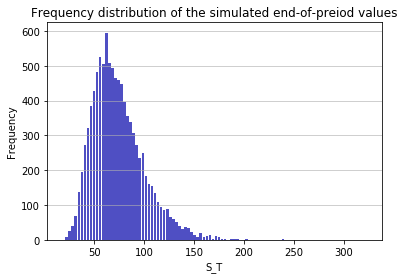

In [165]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [164]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European call', str(p))

European call 17.223880444526937


# Greeks

Greeks measure the sensitivity of the price of a derivative with respect to a certain risk factor

# Delta

Delta, measures the rate of change of the theoritical option value with rspect to changes in the price of the underlying asset. Delta is the first derivative of the value of the option with respect to the price of the underlying asset.

In [203]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.2 * vol ** 0.083) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [204]:
delta(73.98,85,1/12,0.0169,0.54,1.1864, 'call') # value of delta

0.3005846113785726

In [205]:
S = np.linspace(65,90, 21) #plotting the 3d graph of delta
T = np.linspace(0.2,0.083, 21)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 85, T[i],0.6169,0.54, 1.1864, 'call')


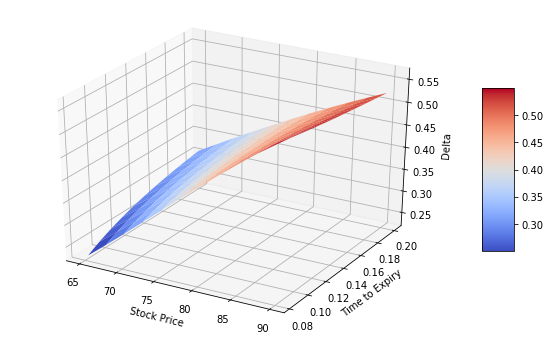

In [206]:
fig = plt.figure(figsize=(10, 6)) #dimension of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [178]:
S = np.linspace(65,90,11)  #plotting the 2d graph 
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 85, 1/12, 0.0169, 0.54, 1.1864, 'call')

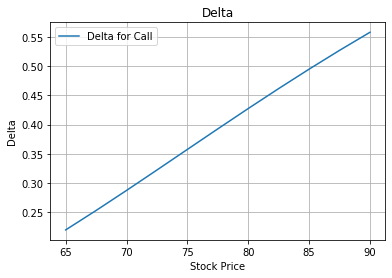

In [179]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

In [180]:
d = delta(73.98,85,1/12,0.0169,0.54,1.1864, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.3431 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.3431 .


# GAMMA

Gamma measures the rate of change in delta with respect to changes in the underlying price.Gamma is the option price second derivative with respect to its underlying price.

In [207]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.2 * vol ** 0.083) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [208]:
gamma(73.98,85,1/12,0.0169,0.54,1.1864, "call")

0.013393011790641993

In [209]:
S = np.linspace(65,90,21) #plotting the 3d graph
T = np.linspace(0.2,0.083, 21)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 85, T[i], 0.0169, 0.54, 1.1864, 'call')

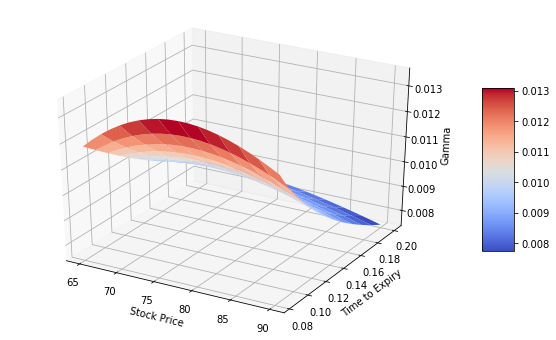

In [210]:
fig = plt.figure(figsize=(10, 6)) #dimension of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [211]:
S = np.linspace(65,90,21) #plotting the 2d graph
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 85, 1/12,0.6169,0.54, 1.1864, 'call')

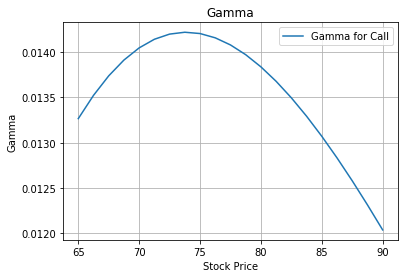

In [212]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

In [213]:
d = gamma(73.98,85,1/12,0.0169,0.54,1.1864, 'call')
print('The value of Gamma is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Gamma is 0.0134 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.0134 .


# RHO

Rho measures the sensitivity of the option to changes in the interest rates, it is the derivative of the option value with respect to the risk free interest rate.

In [214]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.2 * vol ** 0.083) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.2 * vol ** 0.083) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [215]:
rho(73.98,85,1/12,0.6169,0.54,1.1864, 'call') #value of rho

2.2297002765051404

In [216]:
S = np.linspace(65,90, 21) #plotting the 3d graph of rho
T = np.linspace(0.2,0.083, 21)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 85, T[i],0.6169,0.54,1.1864, 'call')

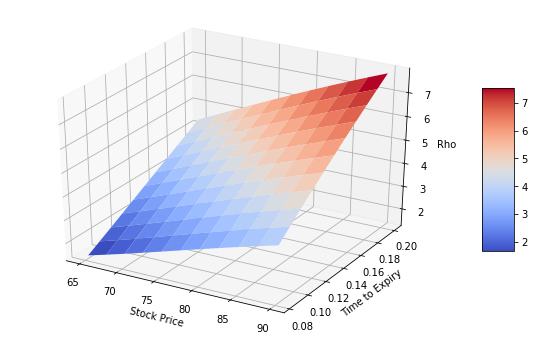

In [217]:
fig = plt.figure(figsize=(10, 6))  #dimension of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);


In [218]:
r = np.linspace(0.2,0.083,11)  #plotting the 2d graph
Rho_Call = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(73.98,85, 1/12, r[i], 0.54, 1.1864, 'call')

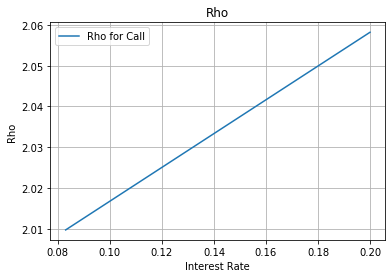

In [219]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

In [220]:
r = rho(73.98,85, 1/12,0.6169,0.54,1.1864, 'call')
print('The value of Rho is', r.round(4),'.','If the interest rate increases 1%, then the value of the option will increase $', r.round(4)*0.01, '.')

The value of Rho is 2.2297 . If the interest rate increases 1%, then the value of the option will increase $ 0.022296999999999997 .


# VEGA

Vega measures the sensitivity of the option to changes in volatility. Vega is the derivative of the option value with to the volatility of the underlying asset.

In [221]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.2 * vol ** 0.083) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [222]:
vega(73.98,85,1/12,0.6169,0.54,1.1864, 'call')  #value of vega

7.694410903634467

In [223]:
S = np.linspace(65,90, 21) #plotting the 3d graph
T = np.linspace(0.1,0.083, 31)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 77, T[i], 0.07, 0.6169,1.1864, 'call')

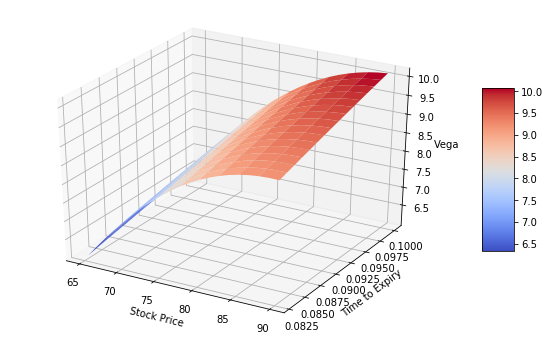

In [224]:
fig = plt.figure(figsize=(10, 6)) #dimensins of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [250]:
vol = np.linspace(65,90,11)    #plotting the 2d graph
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(73.98,85,1/12,0.6169,0.54, vol[i], 'call')

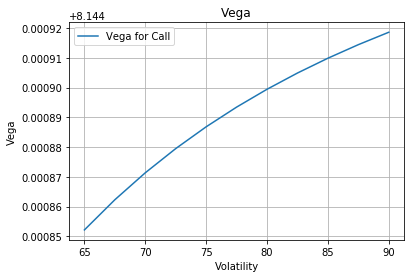

In [251]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call'])

In [252]:
v = vega(73.98,85,1/12,0.6169,0.54,1.1864, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 7.6944 . If the volatility increases 1%, then the value of the option will increase $ 0.076944 .


# THETA

Theta, measures the sensitivity of the value of the derivative to the change in the time to expiration

In [253]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.2 * vol ** 0.083) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.2 * vol ** 0.083) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [254]:
theta(73.98,85,1/12,0.6169,0.54,1.1864, 'call') #value of theta 

57.22657922165498

In [255]:
S = np.linspace(65,90, 21)  #plotting the 3d graph
T = np.linspace(0.2,0.083, 21)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j],85, T[i],0.6169,0.54,1.1864, 'call')

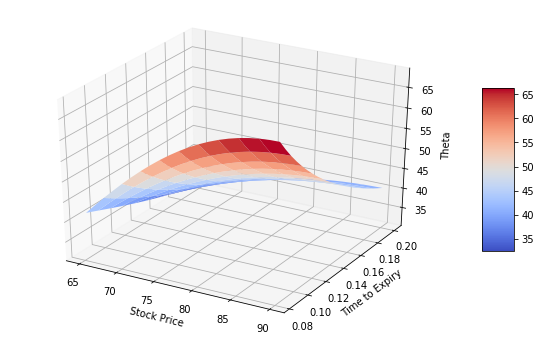

In [256]:
fig = plt.figure(figsize=(10, 6))    #dimensions of thr graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [257]:
T = np.linspace(0.2,0.083,12)   #plotting the 2d graph
Theta_Call = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(73.98,85, T[i],0.6169,0.54,1.1864, 'call')

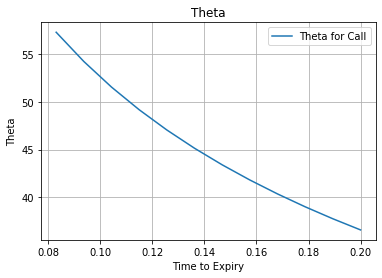

In [258]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

In [259]:
t = theta(73.98,85,1/12,0.6169,0.54,1.1864, 'call')
print('The value of Theta is', t.round(4),'.','If the time increases 1 year, then the value of the option will increase $', t.round(4)*0.01, '.')

The value of Theta is 57.2266 . If the time increases 1 year, then the value of the option will increase $ 0.5722659999999999 .
